# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel ("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

In [3]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [4]:
df.shape

(81937, 15)

In [5]:
#We have 81937 rows in the set. Reduce to 30'000
df = df.head(30000)

In [7]:
#Show columns and datatypes
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [8]:
#The dataset is a list of all dogs in NY with data on each dog.
#"Annimal Name" is the second column. It's the animal's name.
#"Primary Breed" is the race

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [9]:
#What's the most popular dog name?
#What's the most frequent color?
#What's the average dog age?
#IN which ZIP code do the most unvaccinated dogs live?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

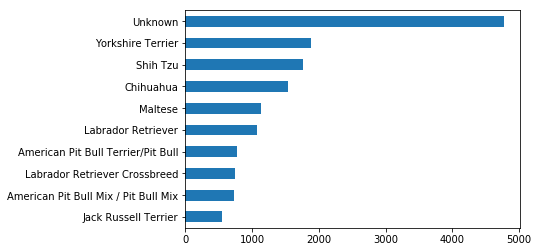

In [10]:
df["Primary Breed"].value_counts().head(10).sort_values().plot(kind="barh")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

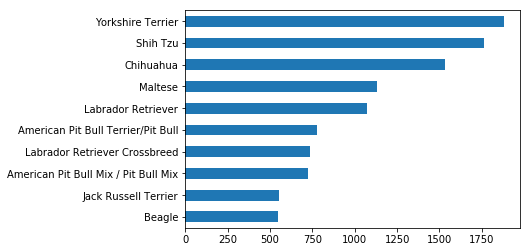

In [11]:
df[df["Primary Breed"] != "Unknown"]["Primary Breed"].value_counts().head(10).sort_values().plot(kind="barh")

## What are the most popular dog names?

In [14]:
df[df["Animal Name"].str.upper() != "UNKNOWN"]["Animal Name"].value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [15]:
len(df[df["Animal Name"] == "Max"])

202

In [16]:
len(df[df["Animal Name"] == "Maxwell"])

11

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [17]:
df["Guard or Trained"].value_counts(normalize=True) * 100

No     99.914254
Yes     0.085746
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [18]:
df["Guard or Trained"].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [19]:
df["Guard or Trained"].value_counts(dropna=False) #gives all values, including NaN

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [20]:
df["Guard or Trained"].fillna("No", inplace=True) #replaces NaN with a value #inplace=True to modify list firectly

## What are the top dog breeds for guard dogs? 

In [31]:
df[(df["Guard or Trained"] == "Yes") & (df["Primary Breed"].str.upper() != "UNKNOWN")]["Primary Breed"].value_counts()

German Shepherd Dog           3
Labrador Retriever            1
Golden Retriever              1
Yorkshire Terrier             1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
German Shepherd Crossbreed    1
Poodle, Standard              1
Schnauzer, Miniature          1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [22]:
df["year"] = df['Animal Birth'].apply(lambda birth: birth.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [23]:
df["age"] = 2017 - df["year"]

In [24]:
df["age"].describe()

count    30000.000000
mean         7.712433
std          4.066803
min          2.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         33.000000
Name: age, dtype: float64

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [25]:
df_zips = pd.read_csv("zipcodes-neighborhoods.csv")

In [26]:
df_zips.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [27]:
combined_df = df.merge(df_zips, left_on="Owner Zip Code", right_on="zip")

In [40]:
combined_df[(combined_df["borough"] == "Bronx") & (combined_df["Animal Name"].str.upper() != "UNKNOWN")]["Animal Name"].value_counts().head()

Bella       22
Max         21
Rocky       20
Lucky       15
Princess    15
Name: Animal Name, dtype: int64

In [41]:
combined_df[(combined_df["borough"] == "Brooklyn") & (combined_df["Animal Name"].str.upper() != "UNKNOWN")]["Animal Name"].value_counts().head()

Max        46
Bella      45
Charlie    42
Rocky      36
Lucy       32
Name: Animal Name, dtype: int64

In [43]:
combined_df[(combined_df["neighborhood"] == "Upper East Side") & (combined_df["Animal Name"].str.upper() != "UNKNOWN")]["Animal Name"].value_counts().head()

Charlie    19
Bella      12
NO NAME    11
Lola       10
Lucy       10
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [45]:
combined_df[combined_df["Primary Breed"] != "Unknown"].groupby("borough")["Primary Breed"].value_counts().groupby(level=0).head(1)

borough        Primary Breed    
Bronx          Yorkshire Terrier    250
Brooklyn       Yorkshire Terrier    501
Manhattan      Chihuahua            511
Queens         Yorkshire Terrier    434
Staten Island  Yorkshire Terrier    171
Name: Primary Breed, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [50]:
combined_df.groupby("Animal Gender")["Spayed or Neut"].value_counts(normalize=True)

Animal Gender  Spayed or Neut
               Yes               1.000000
F              Yes               0.857565
               No                0.142435
M              Yes               0.791323
               No                0.208677
Name: Spayed or Neut, dtype: float64

In [64]:
combined_df.groupby("Primary Breed")["Spayed or Neut"].value_counts(normalize=True).groupby(level=0).head(1).sort_values(ascending=False).head(10)
#This kind of answers the question

Primary Breed              Spayed or Neut
Glen of Imaal Terrier      Yes               1.0
Sealyham Terrier           Yes               1.0
Fila Brasileiro            No                1.0
Manchester Terrier         Yes               1.0
Redbone Coonhound          Yes               1.0
Coonhound, Treeing Walker  Yes               1.0
Coonhound, Blue Tick       Yes               1.0
Coonhound, Black and Tan   Yes               1.0
Russell Terrier            Yes               1.0
Finnish Spitz              Yes               1.0
Name: Spayed or Neut, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [100]:
colors = ["BLACK", "WHITE", "GREY"]

In [102]:
#get all dogs where 2nd and 3rd colors are NaN and where 1st color is black, white or grey
df[df["Animal Third Color"].isnull() & df["Animal Secondary Color"].isnull() & df["Animal Dominant Color"].str.upper().isin(colors)]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3
41,10023,Joey,F,Labrador Retriever Crossbreed,NaN,BLACK,NaN,NaN,2010-03-01,Yes,No,Yes,2014-09-14 21:05:27.303,2014-09-14,2017-07-30,2010,7
55,10467,Angel,M,Bichon Frise,NaN,WHITE,NaN,NaN,2000-11-01,Yes,No,Yes,2014-09-15 12:35:39.320,2014-09-15,2017-10-31,2000,17
56,10467,PEPI,M,Unknown,TOY MALTESE,WHITE,NaN,NaN,2004-01-01,Yes,No,Yes,2014-09-15 12:38:27.453,2014-09-15,2019-10-31,2004,13
63,10309,Coco Chanel,F,Bichon Frise,NaN,White,NaN,NaN,2009-08-01,Yes,No,Yes,2014-09-15 18:11:21.033,2014-09-15,2017-10-22,2009,8
72,11106,Sabrina,F,Unknown,border collie/cocker spaniel,BLACK,NaN,NaN,2002-12-01,Yes,No,Yes,2014-09-16 10:59:12.757,2014-09-16,2017-09-30,2002,15
104,11385,chispita,F,"Poodle, Standard",NaN,WHITE,NaN,NaN,2011-05-01,Yes,No,Yes,2014-09-18 07:05:29.253,2014-09-18,2016-10-09,2011,6
105,11201,Gigi,F,"Poodle, Standard",NaN,Black,NaN,NaN,2009-11-01,Yes,No,Yes,2014-09-18 07:47:24.807,2014-09-18,2019-09-18,2009,8
113,11215,Moneypenny,F,Chinese Crested,NaN,White,NaN,NaN,2014-05-01,No,No,Yes,2014-09-18 12:34:15.297,2014-09-18,2019-09-18,2014,3
114,10463,Kate David,F,Maltese,NaN,White,NaN,NaN,2011-04-01,No,No,No,2014-09-18 13:49:32.863,2014-09-18,2019-09-18,2011,6


In [103]:
#ok it works. now create new column
df["monochrome"] = df["Animal Third Color"].isnull() & df["Animal Secondary Color"].isnull() & df["Animal Dominant Color"].str.upper().isin(colors)

In [105]:
#how many monochrome?
df[df["monochrome"] == True].shape #We get 3938 Animals

(3938, 18)

## How many dogs are in each borough? Plot it in a graph.

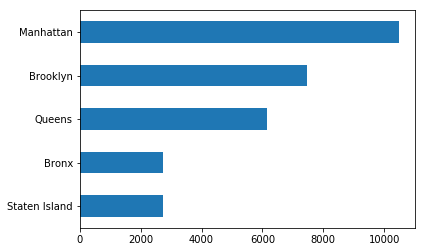

In [112]:
combined_df["borough"].value_counts().sort_values().plot(kind="barh")

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [176]:
df_pop = pd.read_csv("boro_population.csv")

In [177]:
df_pop

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [186]:
no_dogs = combined_df["borough"].value_counts().to_frame().rename(index=str, columns={"borough": "dogs"})

In [187]:
no_dogs

,dogs
Manhattan,10478
Brooklyn,7466
Queens,6154
Bronx,2748
Staten Island,2727


In [189]:
df_pop = df_pop.merge(no_dogs, left_on="borough", right_index=True)

In [191]:
df_pop["dogs per capita"] = df_pop["dogs"] / df_pop["population"]

In [194]:
df_pop[["borough", "dogs per capita"]].sort_values("dogs per capita", ascending=False)

,borough,dogs per capita
0,Manhattan,0.006371
4,Staten Island,0.005746
2,Brooklyn,0.002832
3,Queens,0.002631
1,Bronx,0.001888


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

## What percentage of dogs are not guard dogs?